## Imports

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Reading Dataset

In [14]:
data = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
cars = pd.DataFrame(data)
cars

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [15]:
cars['fuel'].value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

## Encoding the data

In [16]:
cars_copy= cars
cars_copy.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
cars_copy.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)
cars_copy.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
cars_copy.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
cars_copy.head()
cars_copy.drop(['name'],axis=1,inplace=True)

## Normalizing the data values

In [17]:
scaler_minmax = MinMaxScaler()
cars_normalized = pd.DataFrame(scaler_minmax.fit_transform(cars_copy), columns=cars_copy.columns)
cars_normalized.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,0.535714,0.004505,0.086783,0.00,0.0,0.0,0.00
1,0.535714,0.012950,0.061988,0.00,0.0,0.0,0.00
2,0.714286,0.065315,0.123976,0.25,0.0,0.0,0.00
3,0.892857,0.025901,0.057028,0.00,0.0,0.0,0.00
4,0.785714,0.048423,0.174807,0.25,0.0,0.0,0.25


## Splitting dataset


In [18]:
y= cars_normalized['selling_price']
x= cars_normalized.drop(['selling_price'],axis=1)

In [19]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train,'\n')
print(y_train)

          year  km_driven  fuel  seller_type  transmission  owner
3581  0.892857   0.086783  0.25          0.0           0.0   0.00
4191  0.714286   0.089263  0.25          0.5           0.0   0.00
2450  0.892857   0.049590  0.00          0.0           1.0   0.00
984   0.785714   0.086783  0.25          0.0           0.0   0.00
3546  0.928571   0.043391  0.00          0.0           0.0   0.00
...        ...        ...   ...          ...           ...    ...
3335  0.928571   0.039672  0.00          0.0           0.0   0.00
1099  0.785714   0.136374  0.25          0.0           0.0   0.00
2514  0.750000   0.061988  0.25          0.0           0.0   0.00
3606  0.642857   0.086783  0.25          0.0           0.0   0.00
2575  0.892857   0.018595  0.00          0.5           0.0   0.25

[3472 rows x 6 columns] 

3581    0.078829
4191    0.061374
2450    0.054054
984     0.034347
3546    0.031532
          ...   
3335    0.054054
1099    0.056306
2514    0.045045
3606    0.031532
2575    0.0

## Training Model

In [20]:
# model= LinearRegression()
# model trained using random forest regressor
model=RandomForestRegressor(n_estimators=100, random_state=3)
model.fit(x_train,y_train)

LinearRegression()

## Evaluation

In [21]:
# prediction on training data
train_preds = model.predict(x_train)
error = r2_score(y_train,train_preds)
print("accuracy is",error*100)

accuracy is 42.832288947625344


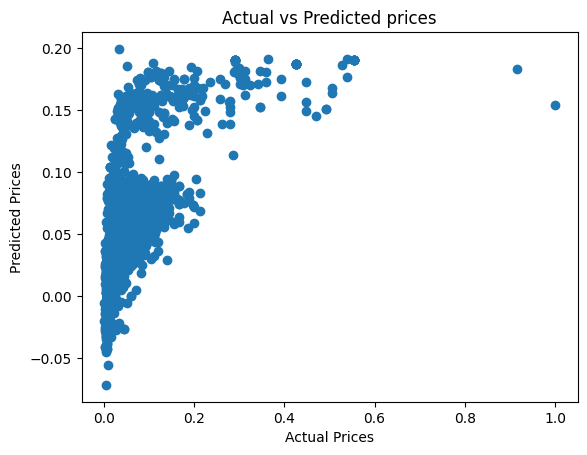

In [22]:
# plotting visually
plt.scatter(y_train,train_preds)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted prices")
plt.show()

In [23]:
# evaluation on test data
test_preds= model.predict(x_test)
error = r2_score(y_test,test_preds)
print("accuracy is",error*100)

accuracy is 49.18005460679501


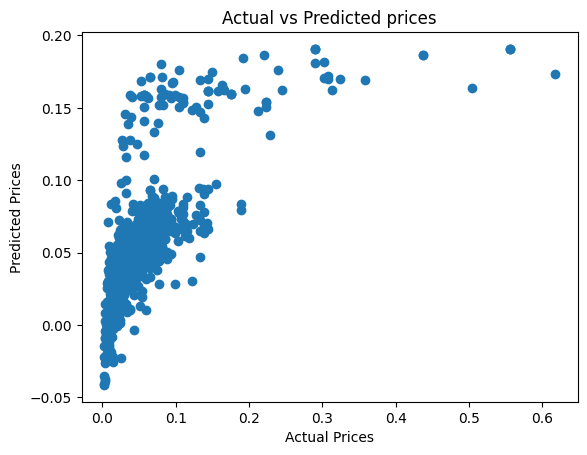

In [24]:
# plotting visually
plt.scatter(y_test,test_preds)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted prices")
plt.show()